###Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###Data Collection:

In [2]:
Customer_churn_data = pd.read_csv("customer_churn.csv")

In [3]:
Customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###columns

In [4]:
Customer_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

###Size of the data

In [5]:
Customer_churn_data.shape

(7043, 21)

Observation: Here we can see that the data has 7043 rows and 21 columns.

Checking the null values in the data :

In [6]:
Customer_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##Different datatypes present

In [7]:
Customer_churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Information of the data :

In [8]:
Customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation : Here we can see that most of the columns are with "object" data type but here we can also observe that the column "TotalCharges" seems to be with "int" or "float" datatypes but it is "Object datatype" so we have to convert it into "float" data type or "int" datatype.

### Now lets have a look at the data of the column "TotalCharges" :

In [9]:
Customer_churn_data["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Observation : Here we can say that there is the data in the columns which is "" and so because of this we are not able to convert into float and so we will replace it with the "nan" data .

### Converting the data "" present in the  column "TotalCharges" into "nan"

In [10]:
Customer_churn_data['TotalCharges']  = Customer_churn_data['TotalCharges'].replace(' ',np.nan)

In [11]:
Customer_churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Now we are converting the column "TotalCharges" into "float" :

In [12]:
Customer_churn_data['TotalCharges'] = Customer_churn_data['TotalCharges'].astype('float')

In [13]:
Customer_churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Observation: Here we can see that we have successfully converted the column "TotalCharges" into "float" .

### Imputing the "Customer_churn_data" into mean :

In [14]:
Customer_churn_data['TotalCharges'] = Customer_churn_data['TotalCharges'].fillna(Customer_churn_data['TotalCharges'].mean())

### Checking the null-values again :

In [15]:
Customer_churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Dropping the column "customerID" as this column has no relation with our label because every record of this column is unique and has no effect on the label .

In [16]:
Customer_churn_data = Customer_churn_data.drop(columns = 'customerID')

In [17]:
Customer_churn_data.shape

(7043, 20)

# Statistical analysis of the data:

In [18]:
Customer_churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Checking the count for our label: "Churn" :

In [19]:
Customer_churn_count = pd.DataFrame(Customer_churn_data["Churn"].value_counts())

In [20]:
Customer_churn_count

,Churn
No,5174
Yes,1869


# Checking the null values in the data:

In [21]:
Customer_churn_data.isnull().values.any()

False

# Plotting heatmap for the null-values:

<AxesSubplot:>

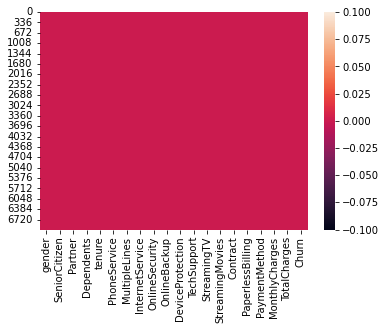

In [22]:
sns.heatmap(Customer_churn_data.isnull())

# Visualization:

In [23]:
Customer_churn_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Univariate Analysis :

## gender :

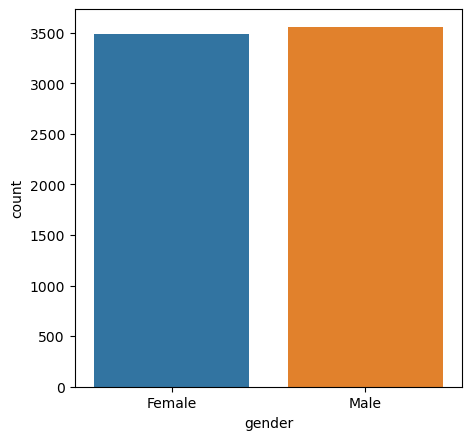

In [24]:
plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.gender);

Observation : Here we can see that both of the categories "Male" and "Female" are almost with same count .

## SeniorCitizen :

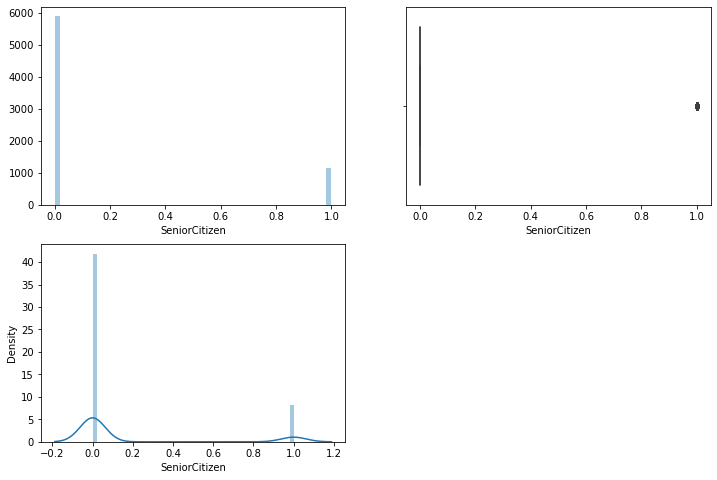

In [25]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Customer_churn_data['SeniorCitizen'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(Customer_churn_data['SeniorCitizen']);
plt.subplot(2,2,3)
sns.distplot(Customer_churn_data['SeniorCitizen']);

Observation : Here we can see that the outlier is seen in the bocplot and the distribution curve is not at all normal .

## Partner :

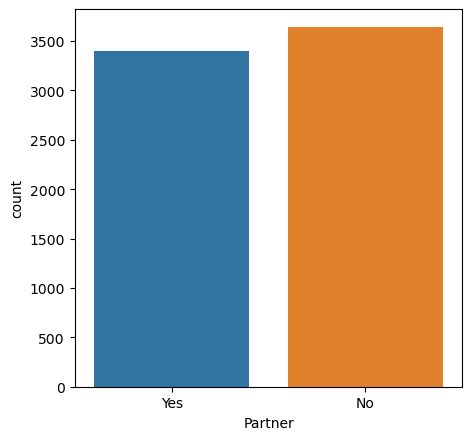

In [26]:
# Partner :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.Partner);

Observation : Here we can see that the category "No" has the highest count compared with the category "Yes" .

## Dependents :

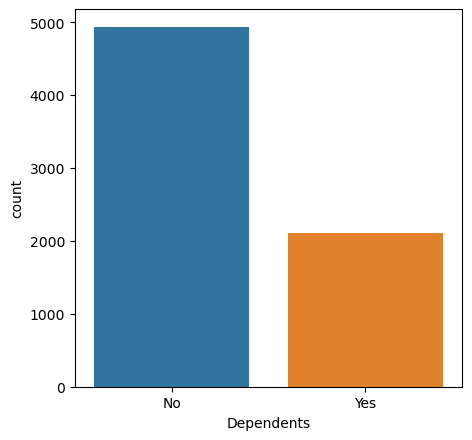

In [27]:
# Dependents :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.Dependents);

Observation : Here we can see that the column has highest count for the category "No" compared with the category "Yes" .

## tenure :

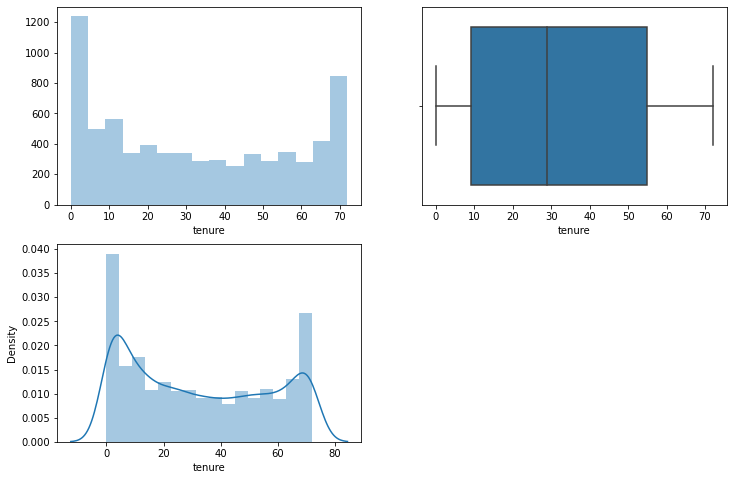

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Customer_churn_data['tenure'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(Customer_churn_data['tenure']);
plt.subplot(2,2,3)
sns.distplot(Customer_churn_data['tenure']);

Observation : Here we can see that the boxplot has no outliers present and the distribution curve is not at all normal .

## PhoneService :

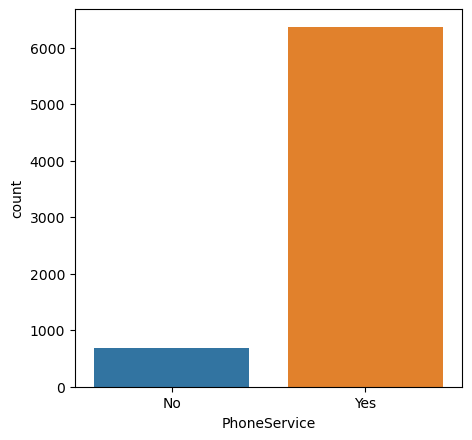

In [29]:
# PhoneService :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.PhoneService);

Observation : Here we can say that the column hasthe highest count for the category "yes" when compared to "No" .

## MultipleLines :

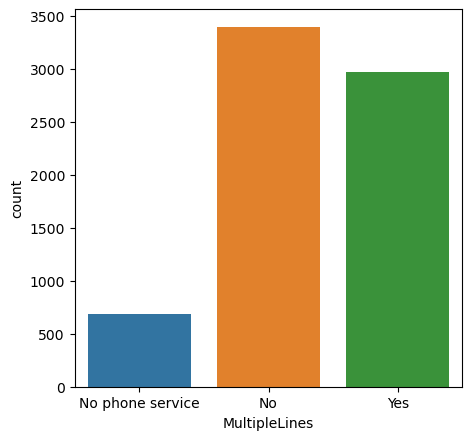

In [30]:
# MultipleLines :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.MultipleLines);

Observation : Here we can see that the column has the highest count for the category "No" and the least count is for the category "No Service" .

## InternetService :

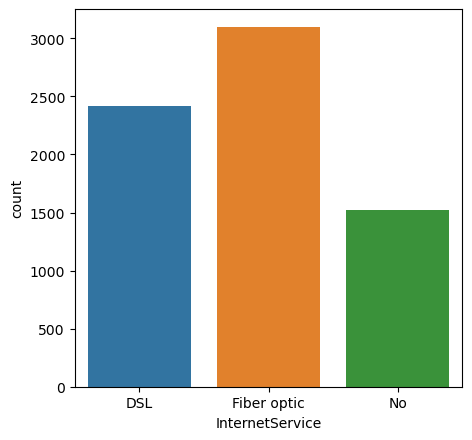

In [31]:
# InternetService :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.InternetService);


Observation : Here we can see that the column has highest count for the category "Fiber Optic"and the least count is for the category "No" .

## OnlineSecurity :

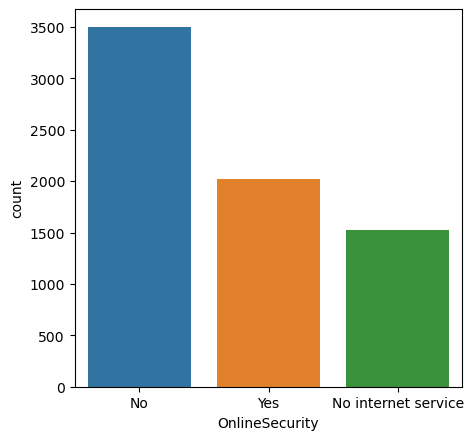

In [32]:
# OnlineSecurity :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.OnlineSecurity);

Observation : Here we can see that the column has highest count for the category "No" and the least count is for the category "No internet service" .

## OnlineBackup :

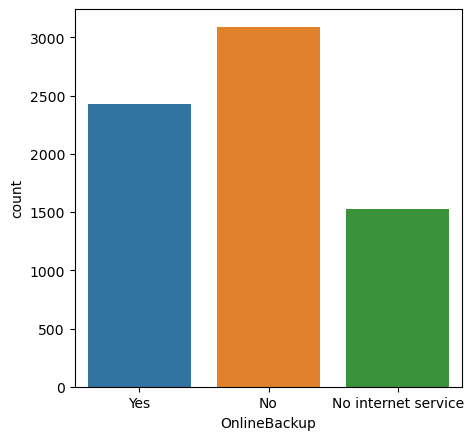

In [33]:
# OnlineBackup :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.OnlineBackup);


Observation : here we can see that the column has the highest count for the category "No" and the least count is for the category "No internet Service" .

## DeviceProtection :

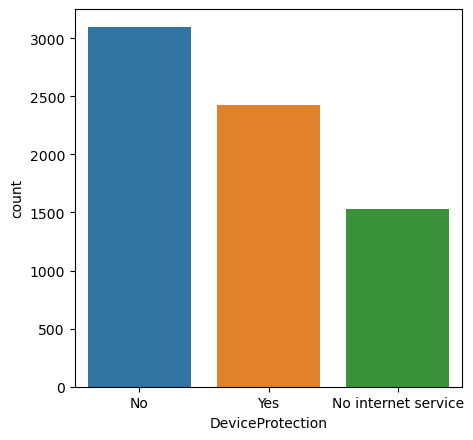

In [34]:
# DeviceProtection :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.DeviceProtection);


Observation : Here we can see that the column has the highest count for the category "No" and the least count for the category "No internet service" .

## TechSupport :

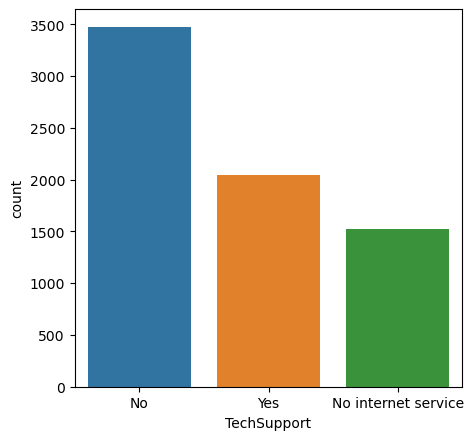

In [35]:
# TechSupport :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.TechSupport);


Observation : Here we can see that the column has highest count for the category "No" and the least count for the category "No internet service" .

## StreamingTV :

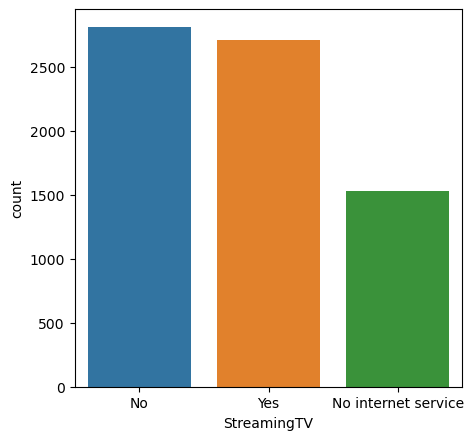

In [36]:
# StreamingTV :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.StreamingTV);


Observation : Here we can see that teh column has the highest count for the category "No" and the least count is for the category "No internet service" .

## StreamingMovies :

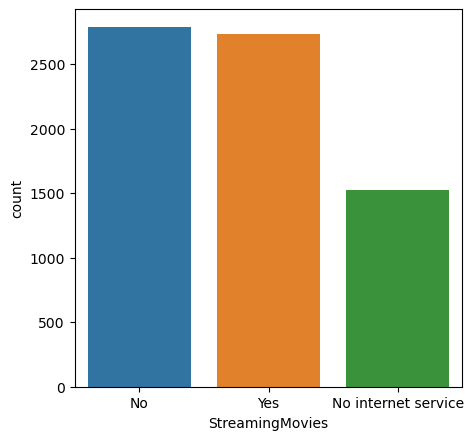

In [37]:
# StreamingMovies :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.StreamingMovies);

Observation : Here we can see that the column has the highest cont for the category "No" , both of the ategories "yes" and "No" are almost equal but the least count is for the category "No internet service" . 

## Contract :

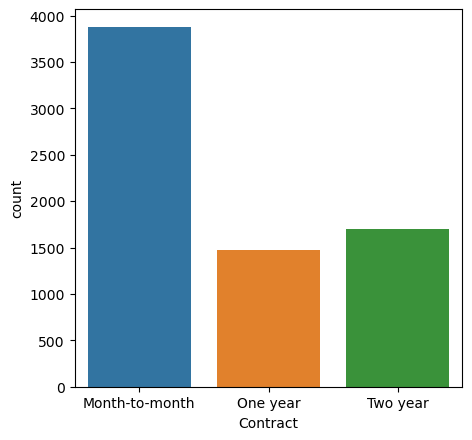

In [38]:
# Contract :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.Contract);

Observation : Here we can see that the column has the highest count for the category "Month-to-month" and the least count for the category "One year contract" .

## PaperlessBilling :

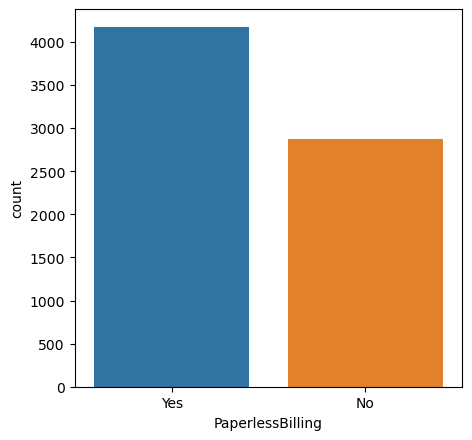

In [39]:
# PaperlessBilling :

plt.figure(figsize=(5,5),dpi = 100)
sns.countplot(Customer_churn_data.PaperlessBilling);

Observation : Here we can see that the column has the highest count for the category "yes" than the other category "No" .

## PaymentMethod :

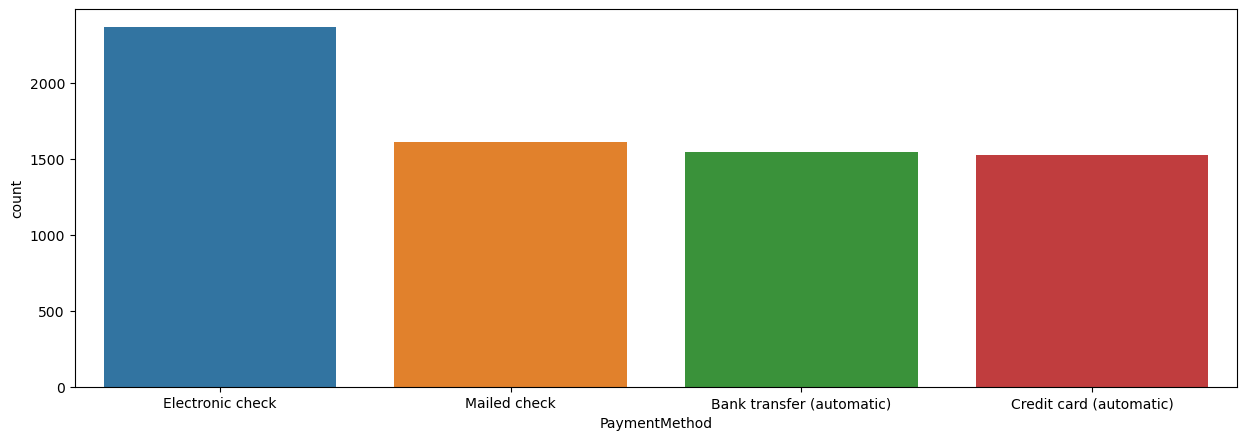

In [40]:
# PaymentMethod :

plt.figure(figsize=(15,5),dpi = 100)
sns.countplot(Customer_churn_data.PaymentMethod);

Observation : Here we can see that the column has the highest count for the category "Electronic check" , followed by the category "Mailed check" and both the categories Bank transfer and "Credit card" have more or less similar count .

## TotalCharges :

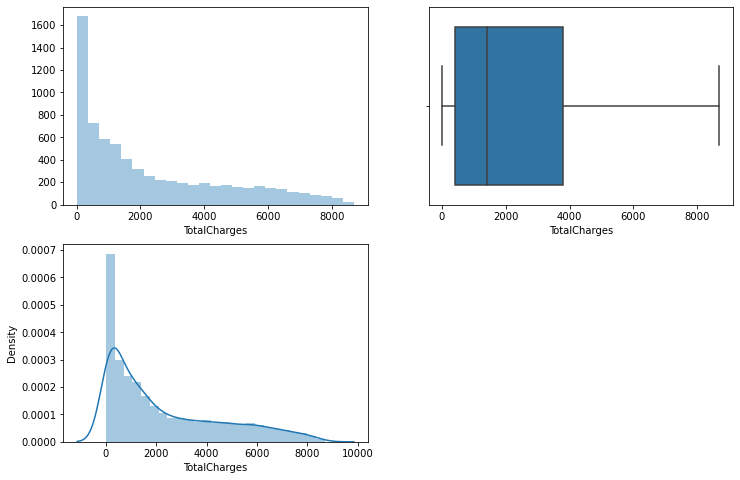

In [41]:
# TotalCharges :

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Customer_churn_data['TotalCharges'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(Customer_churn_data['TotalCharges']);
plt.subplot(2,2,3)
sns.distplot(Customer_churn_data['TotalCharges']);

Observation : here we can see that the boxplot has no outliers and the distribution curve is high skewness towards right .

# Bivariate Analysis :

## Gender :

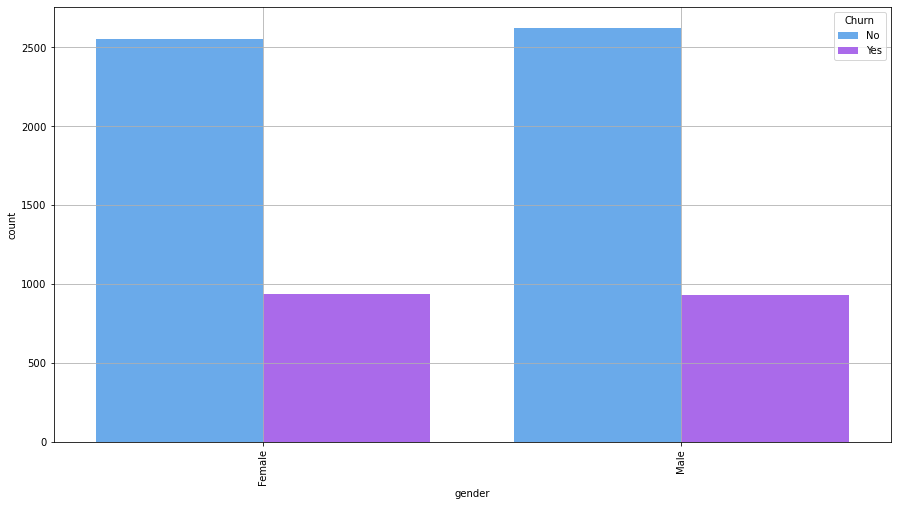

In [42]:
plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['gender'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [43]:
cross = pd.crosstab(index = Customer_churn_data['gender'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
gender,,,
Female,2549,939,26.920872
Male,2625,930,26.160338


<AxesSubplot:xlabel='gender', ylabel='churn%'>

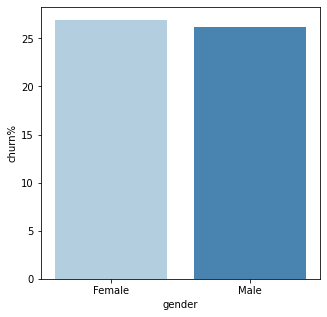

In [44]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the churn rate in both of the categories are same but to more keen the female customers have highest churn rate than male customers .

## SeniorCitizen :

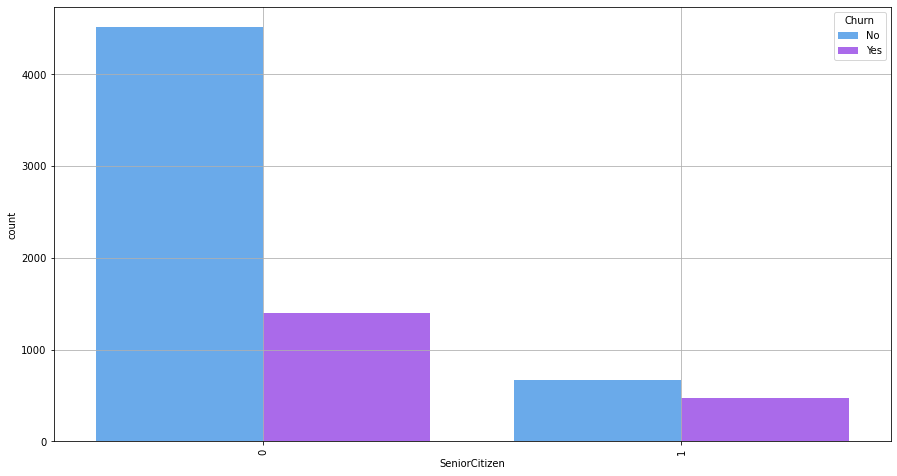

In [45]:
# SeniorCitizen :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['SeniorCitizen'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()


In [46]:
cross = pd.crosstab(index = Customer_churn_data['SeniorCitizen'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
SeniorCitizen,,,
0,4508,1393,23.606168
1,666,476,41.681261


<AxesSubplot:xlabel='SeniorCitizen', ylabel='churn%'>

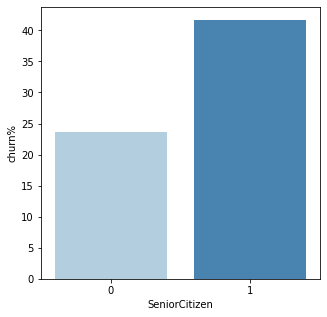

In [47]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : here we can see that the churn rate is highest for the catgory 1 with rate of above or equal 40%

## Partner :

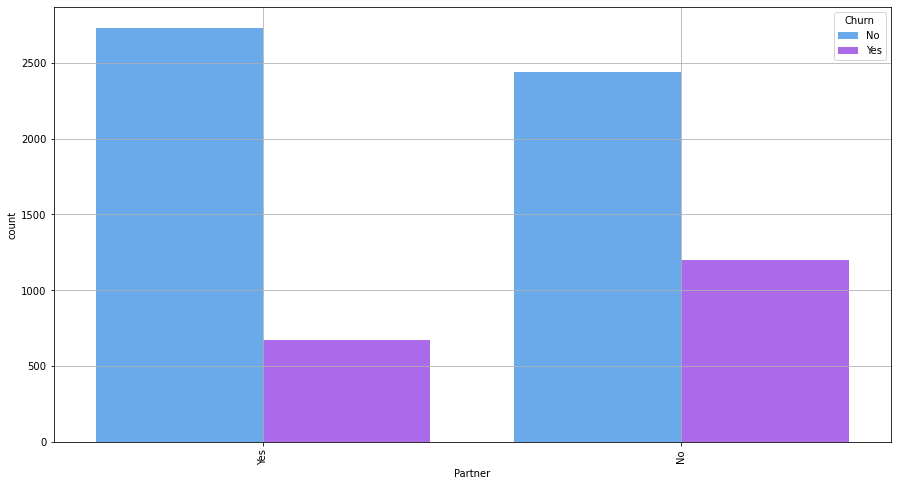

In [48]:
# Partner :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['Partner'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [49]:
cross = pd.crosstab(index = Customer_churn_data['Partner'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
Partner,,,
No,2441,1200,32.957979
Yes,2733,669,19.664903


<AxesSubplot:xlabel='Partner', ylabel='churn%'>

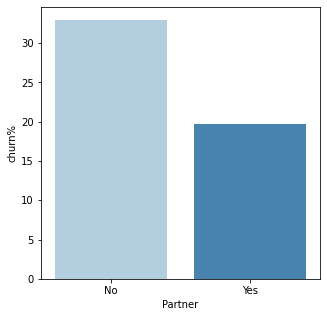

In [50]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn rate is for the customer with "No Partners" of about 35% .

## Dependents :

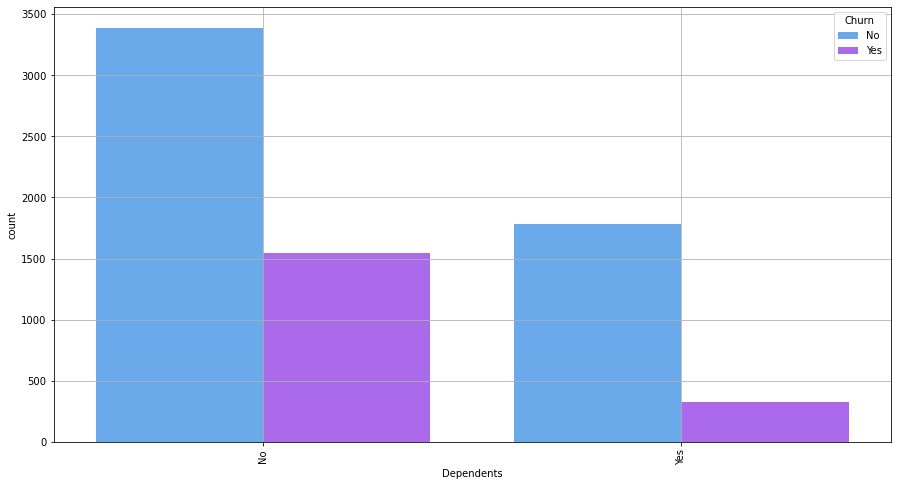

In [51]:
# Dependents :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['Dependents'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [52]:
cross = pd.crosstab(index = Customer_churn_data['Dependents'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
Dependents,,,
No,3390,1543,31.279140
Yes,1784,326,15.450237


<AxesSubplot:xlabel='Dependents', ylabel='churn%'>

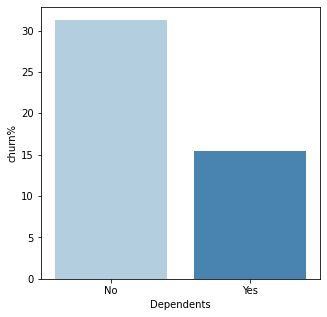

In [53]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the churn% is highest for the category of customers who dont have dependents of about 34%

## tenure :

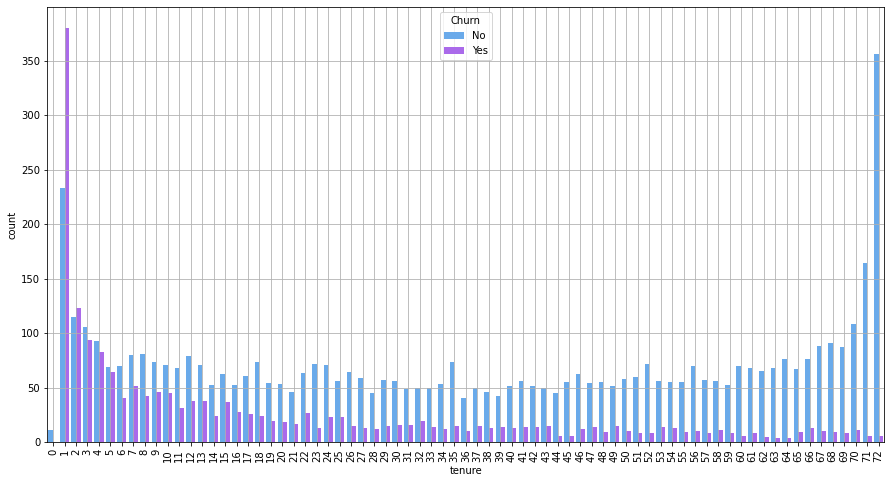

In [54]:
# tenure :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['tenure'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

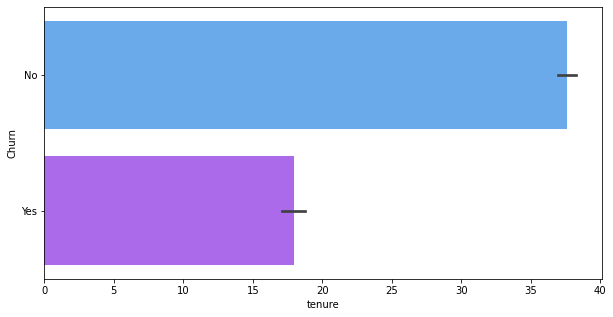

In [55]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'tenure', y = 'Churn', data = Customer_churn_data, palette = 'cool')


In [56]:
cross = pd.crosstab(index = Customer_churn_data['tenure'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
tenure,,,
0,11,0,0.000000
1,233,380,61.990212
2,115,123,51.680672
3,106,94,47.000000
4,93,83,47.159091
...,...,...,...
68,91,9,9.000000
69,87,8,8.421053
70,108,11,9.243697


<AxesSubplot:xlabel='tenure', ylabel='churn%'>

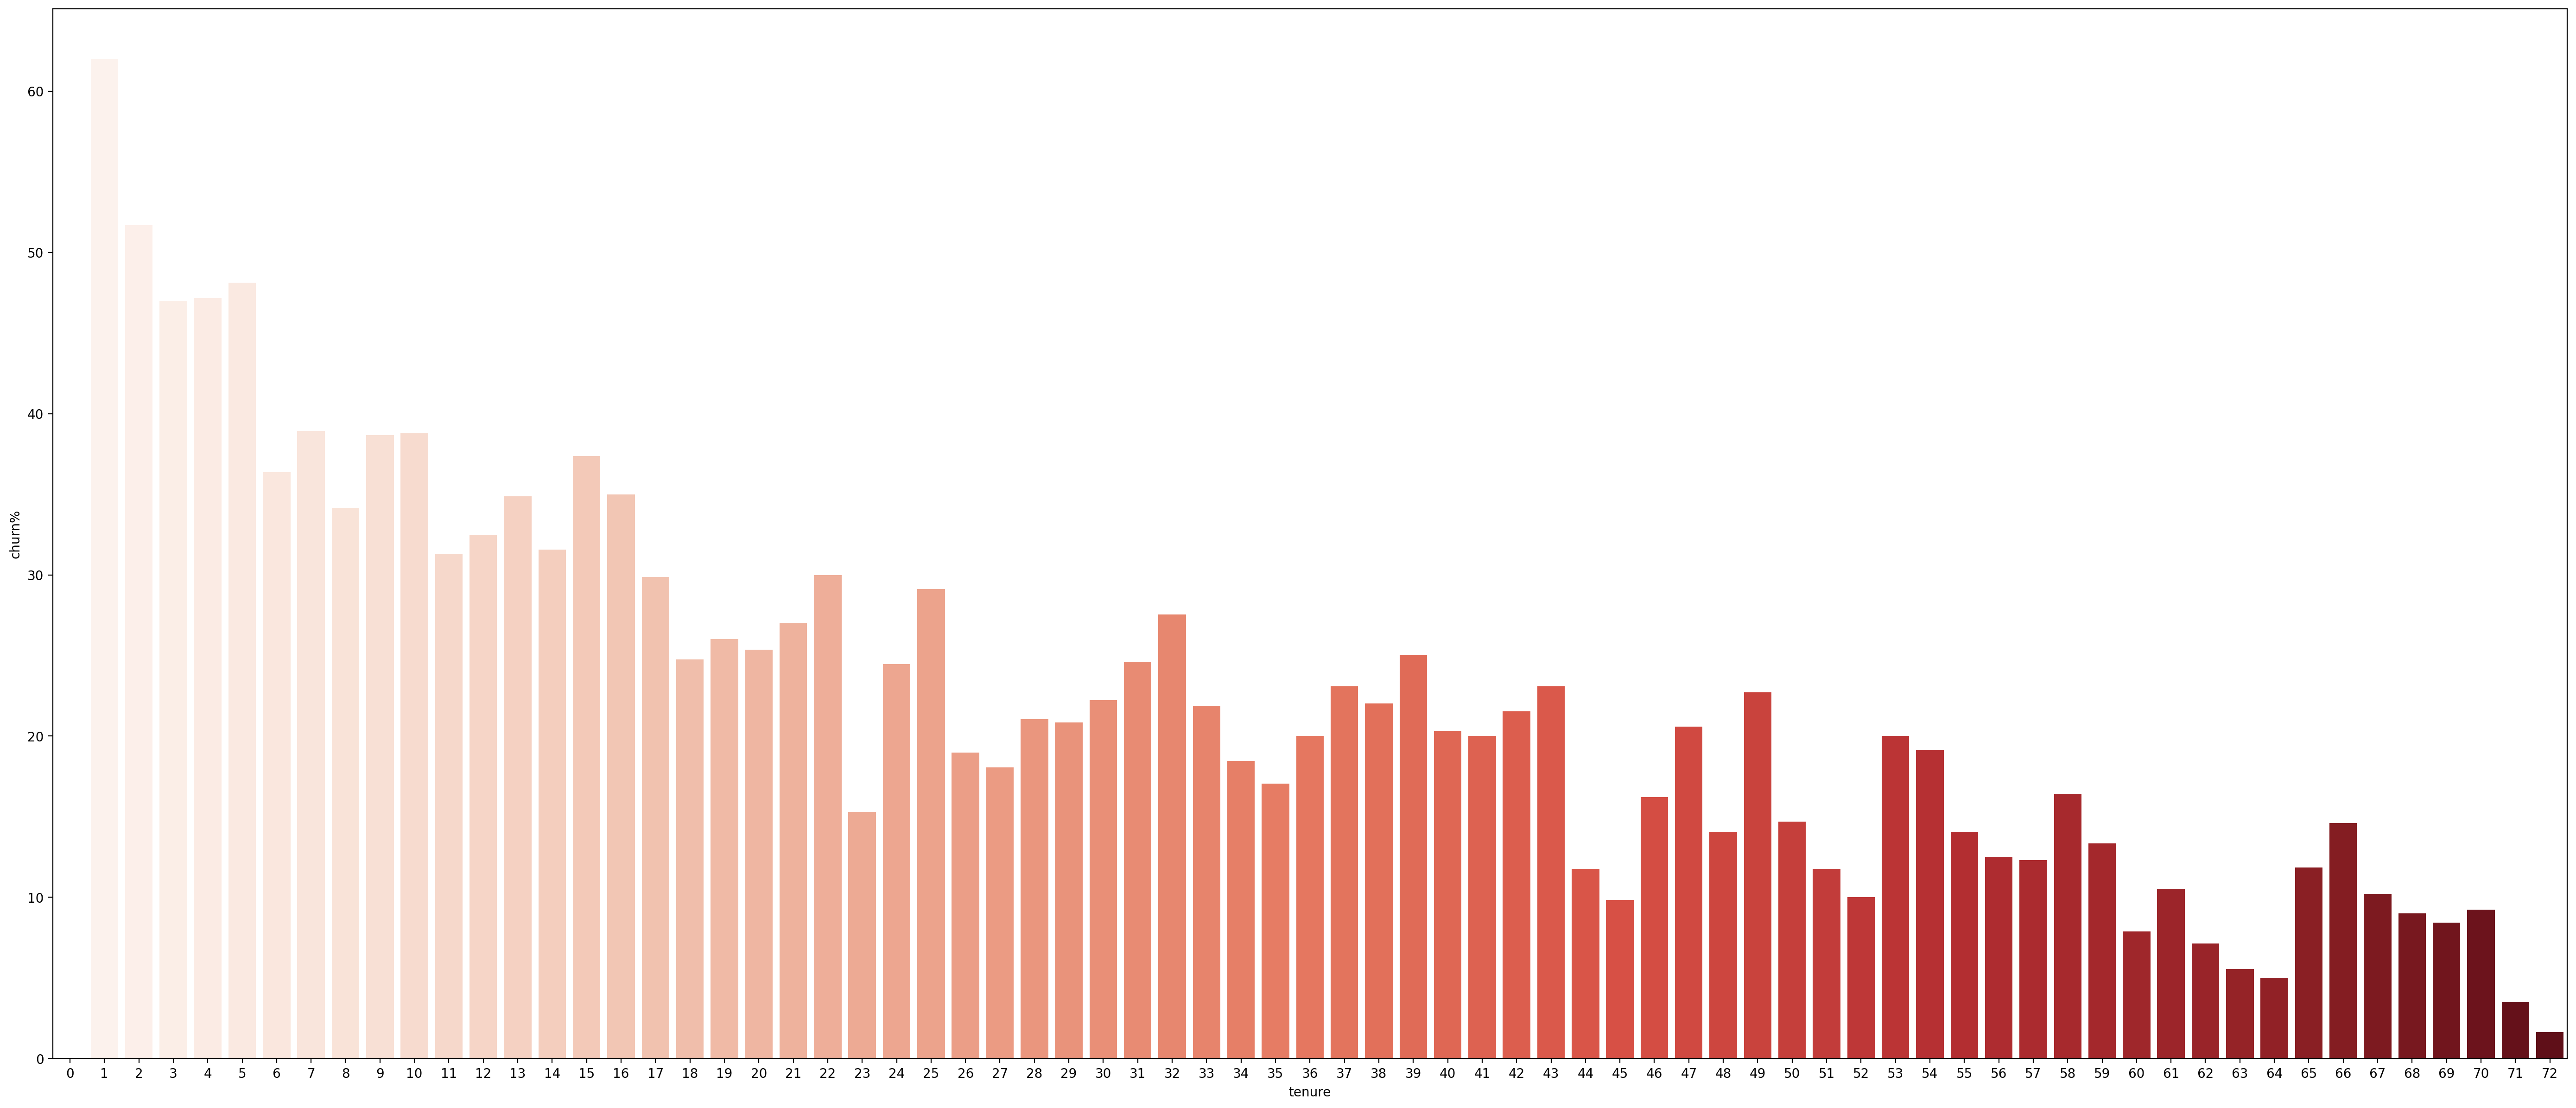

In [57]:
plt.figure(figsize = (35,15),dpi = 200)
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Reds')

Observation : Here we can see that the churn% is highest for the customer with less tenure , to observe we can see that as the tenurity of the customer is increasing the churn% is decreasing .

## PhoneService :

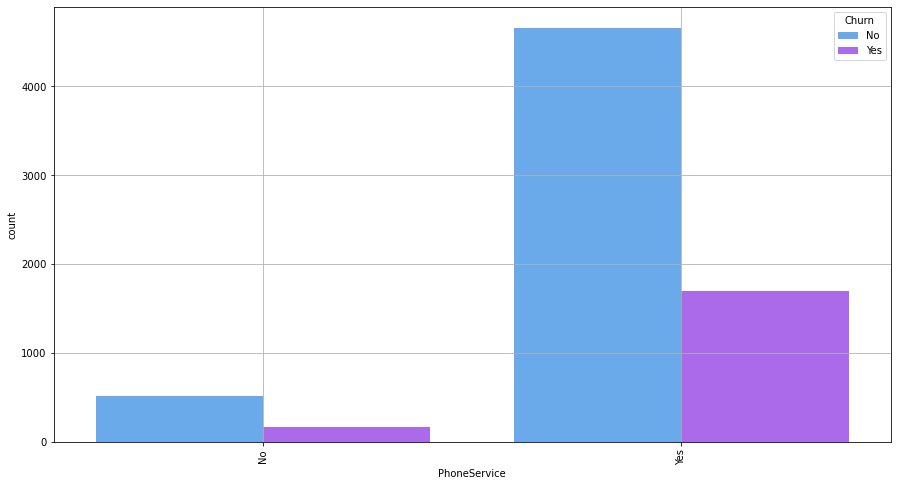

In [58]:
# PhoneService :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['PhoneService'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [59]:
cross = pd.crosstab(index = Customer_churn_data['PhoneService'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
PhoneService,,,
No,512,170,24.926686
Yes,4662,1699,26.709637


<AxesSubplot:xlabel='PhoneService', ylabel='churn%'>

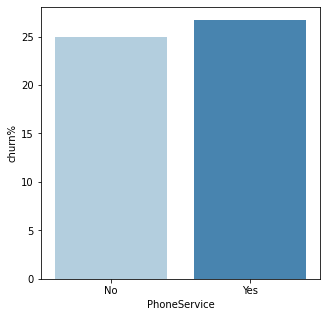

In [60]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : here we can see that the curn% is highest for the category of the customers who opted the Phone service when compared to the customers who did not opted the phone service .

## MultipleLines :

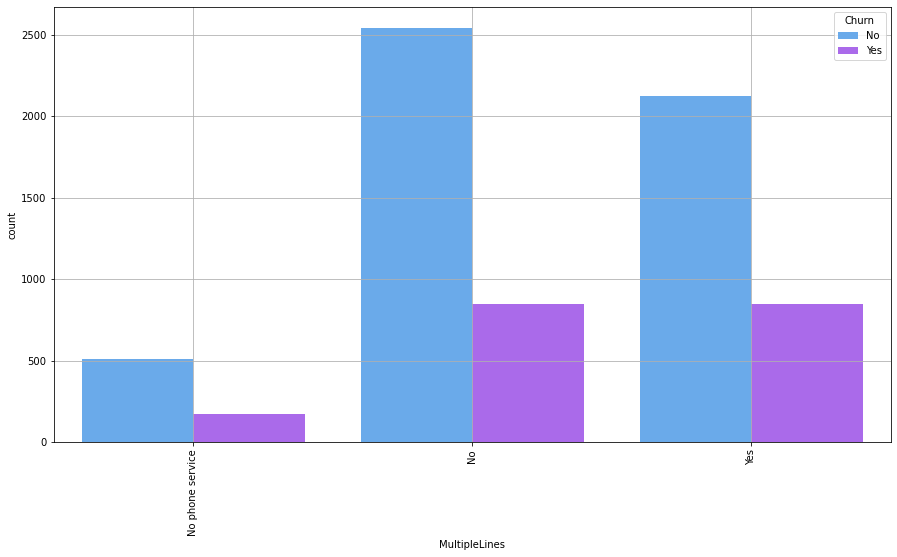

In [61]:
# MultipleLines :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['MultipleLines'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [62]:
cross = pd.crosstab(index = Customer_churn_data['MultipleLines'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
MultipleLines,,,
No,2541,849,25.044248
No phone service,512,170,24.926686
Yes,2121,850,28.609896


<AxesSubplot:xlabel='MultipleLines', ylabel='churn%'>

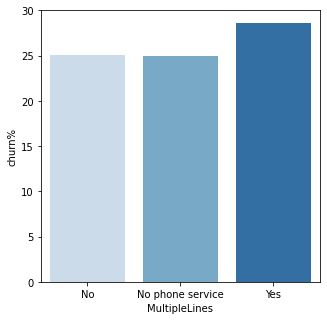

In [63]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the churn% is highest for the category of the customers who opted for the multiple lines than the customers who dont opt for the multiple lines .

## InternetService :

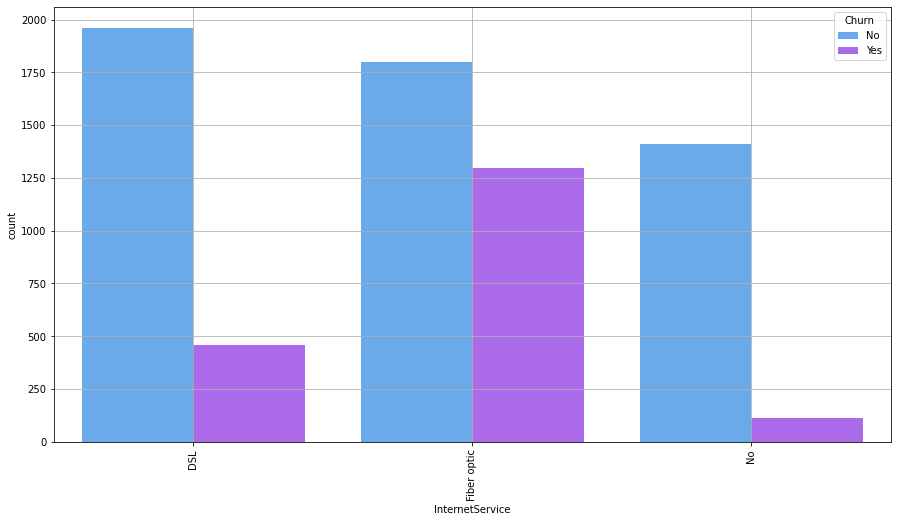

In [64]:
# InternetService :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['InternetService'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [65]:
cross = pd.crosstab(index = Customer_churn_data['InternetService'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
InternetService,,,
DSL,1962,459,18.959108
Fiber optic,1799,1297,41.892765
No,1413,113,7.404980


<AxesSubplot:xlabel='InternetService', ylabel='churn%'>

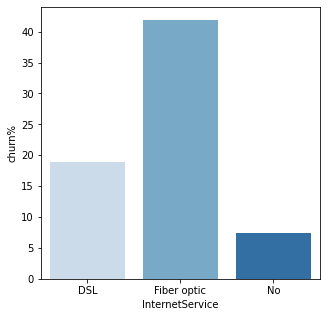

In [66]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the churn rate is highest for thecategory of the customers who opted the Fiber optic internet service followed by the customers who opted DSL and least is for the customers who dis not opt Internet service .

## OnlineSecurity :

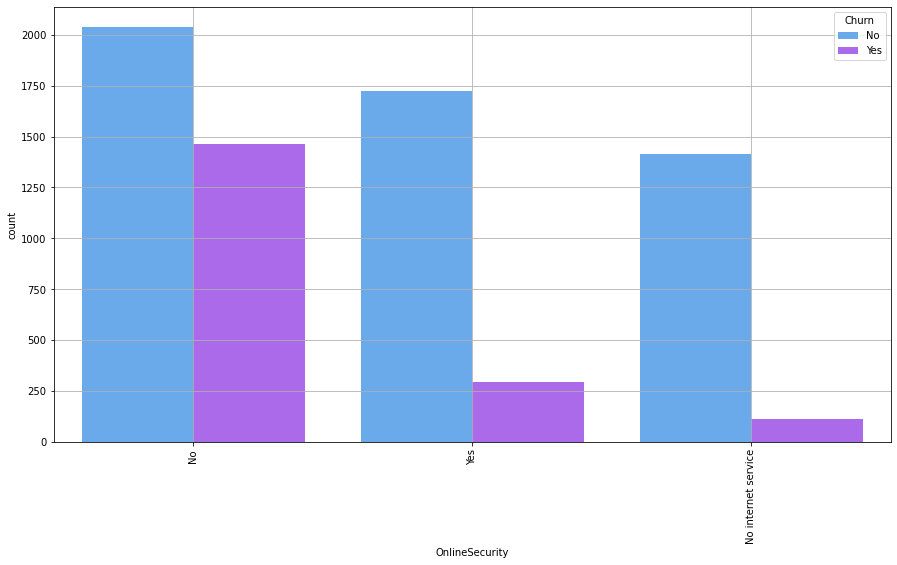

In [67]:
# OnlineSecurity :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['OnlineSecurity'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [68]:
cross = pd.crosstab(index = Customer_churn_data['OnlineSecurity'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
OnlineSecurity,,,
No,2037,1461,41.766724
No internet service,1413,113,7.404980
Yes,1724,295,14.611194


<AxesSubplot:xlabel='OnlineSecurity', ylabel='churn%'>

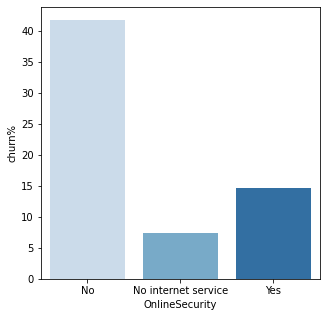

In [69]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the category of customers who has the highest churn rate is for the customers who did not opt for the online security for about 44%, followed by the customers who have opted the online security for about 14% and the least churn rate for the customers who have not opted the internet service for only about 7% 

## OnlineBackup :

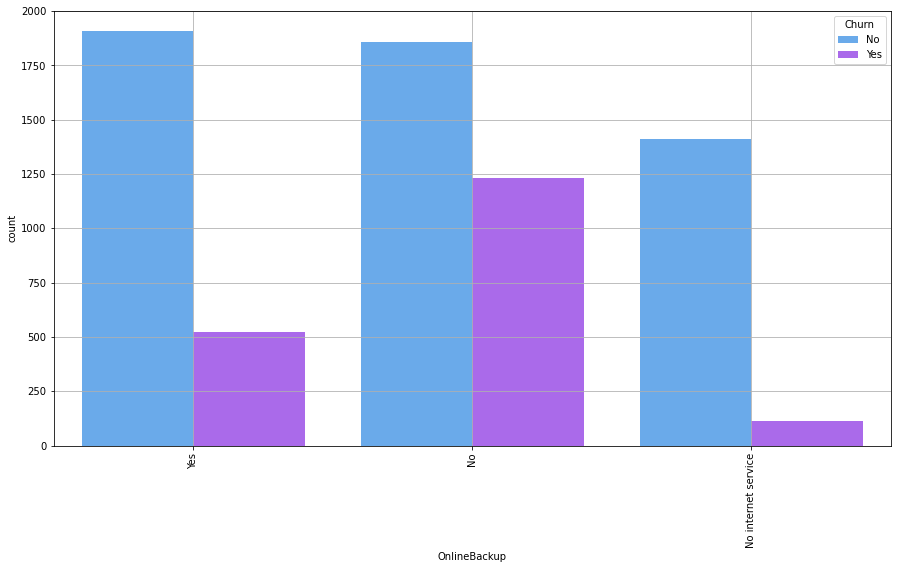

In [70]:
# OnlineBackup :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['OnlineBackup'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [71]:
cross = pd.crosstab(index = Customer_churn_data['OnlineBackup'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
OnlineBackup,,,
No,1855,1233,39.928756
No internet service,1413,113,7.404980
Yes,1906,523,21.531494


<AxesSubplot:xlabel='OnlineBackup', ylabel='churn%'>

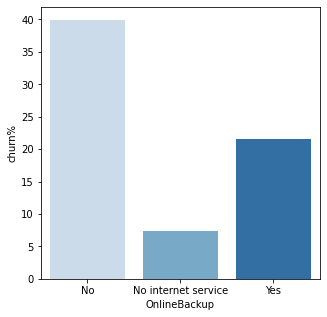

In [72]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn rate is for the category of the customers who have not opted for any online back-up for about 39% and followed by the customers who have opted online backup for about 22% and least is for the category of the customers who did not opt for any internet service for about 7% 

## DeviceProtection :

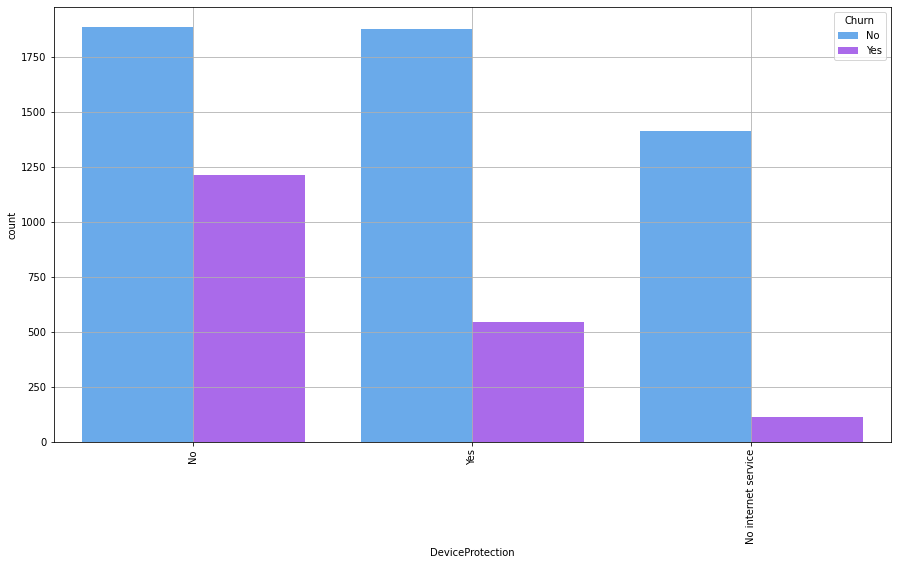

In [73]:
# DeviceProtection :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['DeviceProtection'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [74]:
cross = pd.crosstab(index = Customer_churn_data['DeviceProtection'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
DeviceProtection,,,
No,1884,1211,39.127625
No internet service,1413,113,7.404980
Yes,1877,545,22.502064


<AxesSubplot:xlabel='DeviceProtection', ylabel='churn%'>

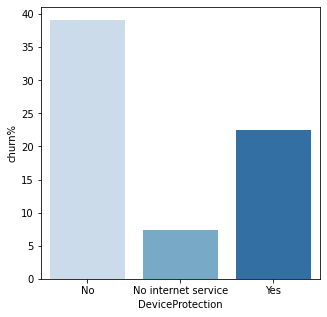

In [75]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the churn rate is highest for the category of the customers with no device protection for about 38% and then followed by the customers with device protection for about 23% and the least for the customers with no internet service for about only 7%

## TechSupport :

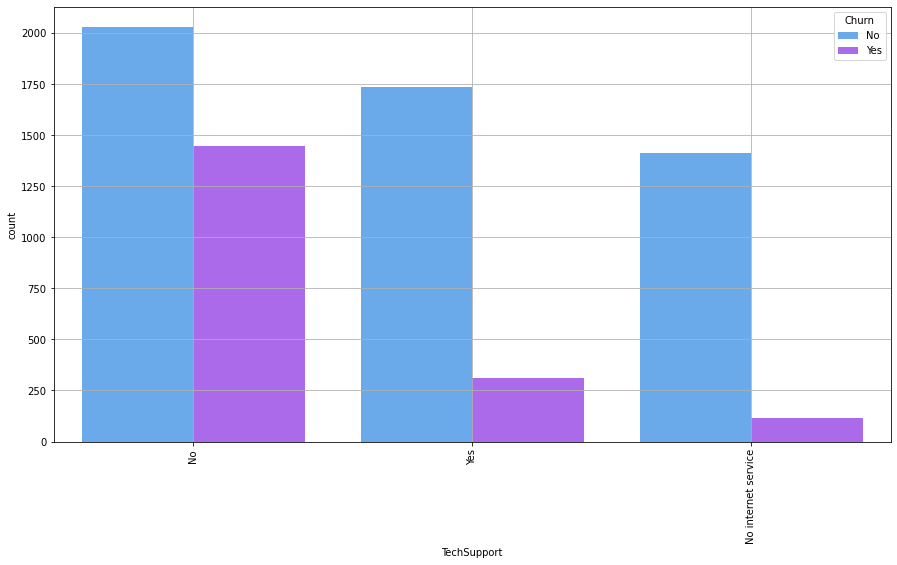

In [76]:
# TechSupport :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['TechSupport'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [77]:
cross = pd.crosstab(index = Customer_churn_data['TechSupport'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
TechSupport,,,
No,2027,1446,41.635474
No internet service,1413,113,7.404980
Yes,1734,310,15.166341


<AxesSubplot:xlabel='TechSupport', ylabel='churn%'>

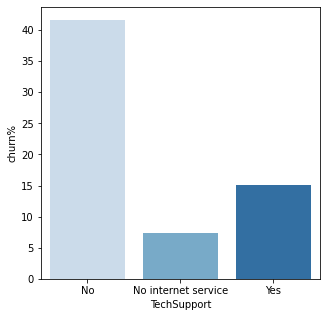

In [78]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn rate is for the customer with no tech support for about 43% followed by the customers with tech support for about 15% and the least churn% is by the customers with no internet service for about only 7%

## StreamingTV :

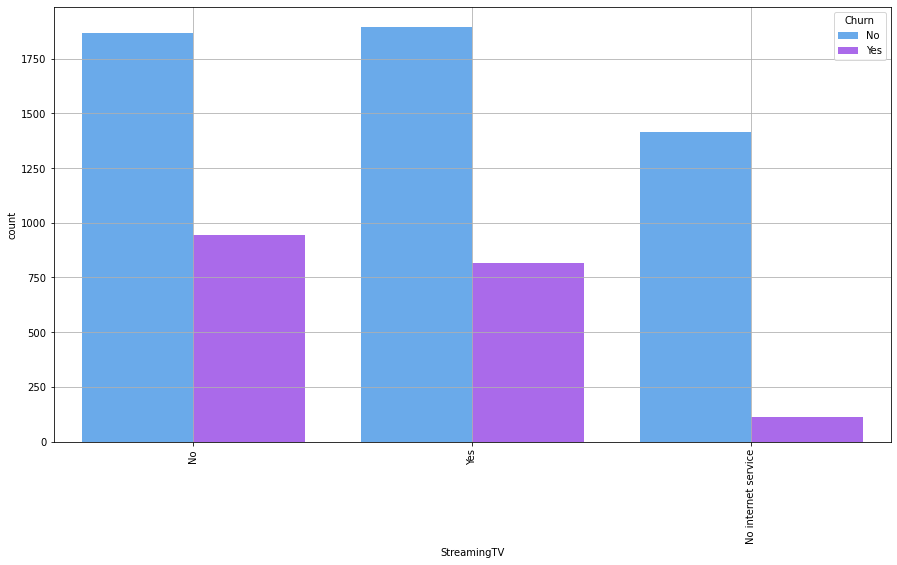

In [79]:
# StreamingTV :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['StreamingTV'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [80]:
cross = pd.crosstab(index = Customer_churn_data['StreamingTV'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
StreamingTV,,,
No,1868,942,33.523132
No internet service,1413,113,7.404980
Yes,1893,814,30.070188


<AxesSubplot:xlabel='StreamingTV', ylabel='churn%'>

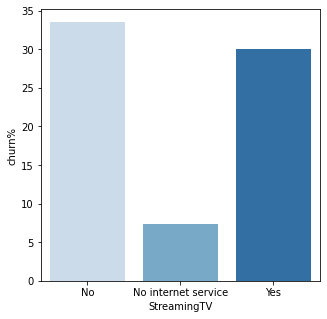

In [81]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn% is for the category of the customers with no Streaming of TV for about 33% followed by the customers with Streaming TV for about 29% and the least is for the customers with no internet service for about 7%

## StreamingMovies :

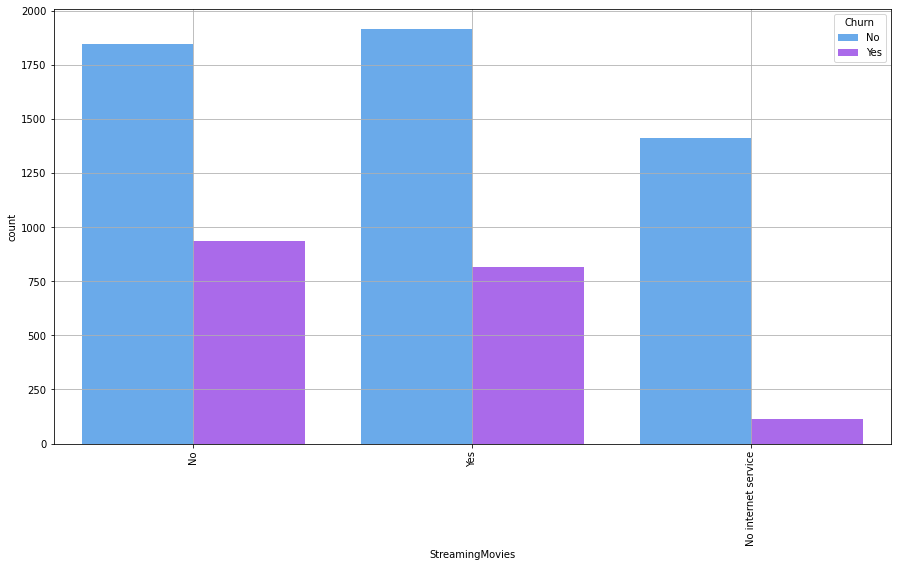

In [82]:
# StreamingMovies :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['StreamingMovies'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [83]:
cross = pd.crosstab(index = Customer_churn_data['StreamingMovies'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
StreamingMovies,,,
No,1847,938,33.680431
No internet service,1413,113,7.404980
Yes,1914,818,29.941435


<AxesSubplot:xlabel='StreamingMovies', ylabel='churn%'>

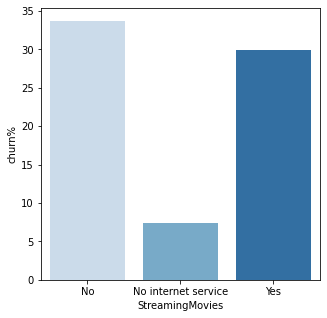

In [84]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

## Contract :

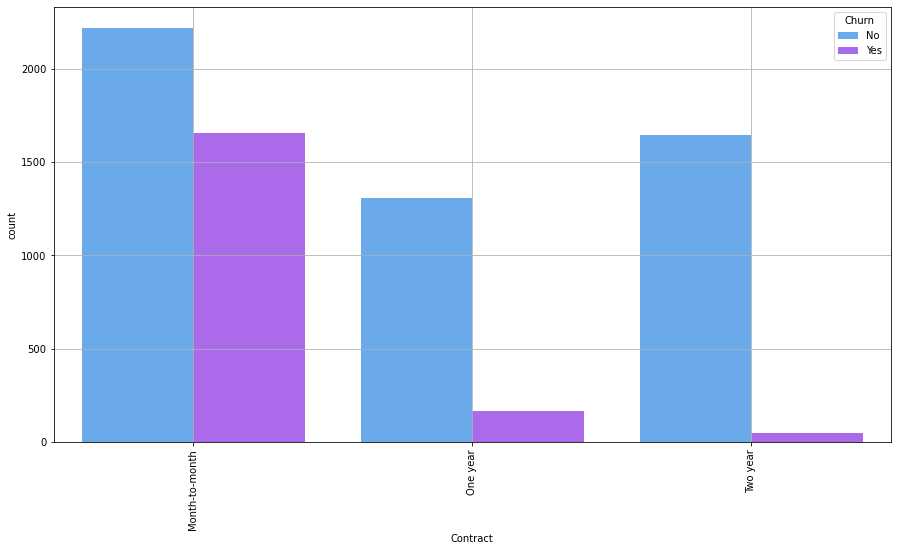

In [85]:
# Contract :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['Contract'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [86]:
cross = pd.crosstab(index = Customer_churn_data['Contract'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
Contract,,,
Month-to-month,2220,1655,42.709677
One year,1307,166,11.269518
Two year,1647,48,2.831858


<AxesSubplot:xlabel='Contract', ylabel='churn%'>

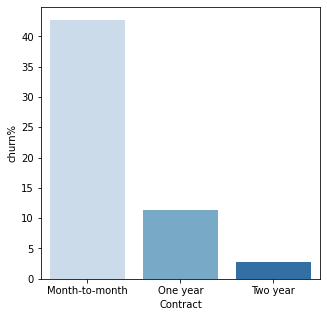

In [87]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn rate is for the category of the customers who are with month-to-month contract than the others with about 44% followed by the customers with 1 year contract for about 12% and the least churn% is for the category of the customers with 2 years of contract for about 3% only

## PaperlessBilling :

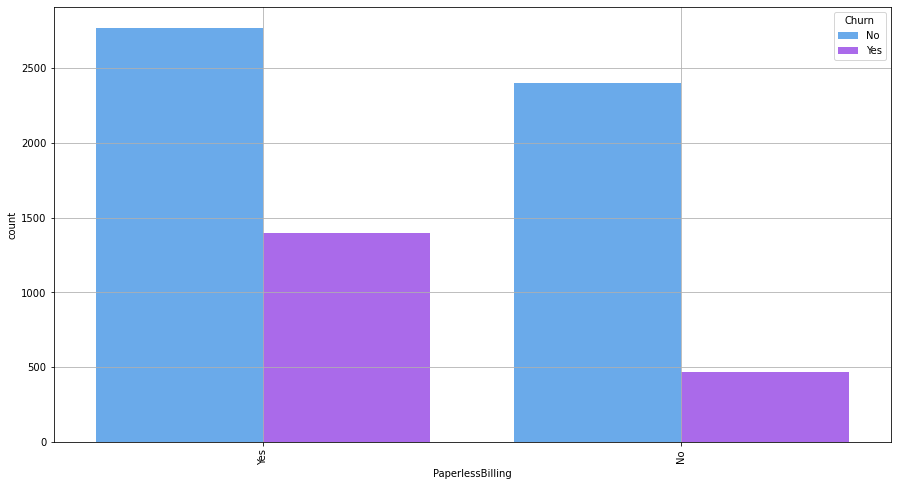

In [88]:
# PaperlessBilling :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['PaperlessBilling'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [89]:
cross = pd.crosstab(index = Customer_churn_data['PaperlessBilling'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
PaperlessBilling,,,
No,2403,469,16.330084
Yes,2771,1400,33.565092


<AxesSubplot:xlabel='PaperlessBilling', ylabel='churn%'>

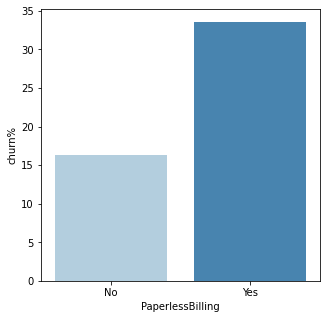

In [90]:
plt.figure(figsize = (5,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn% is for the customers with paperless billing for about 34% followed by paperbilling for about 16%

## PaymentMethod :

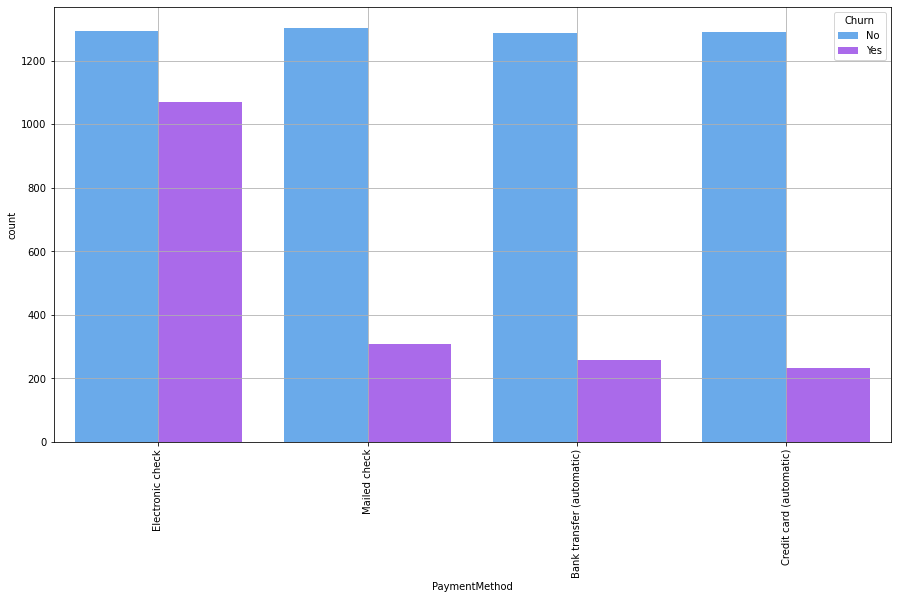

In [91]:
# PaymentMethod :

plt.figure(figsize = (15,8))
sns.countplot(x=Customer_churn_data['PaymentMethod'], hue = Customer_churn_data['Churn'], palette = 'cool')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [92]:
cross = pd.crosstab(index = Customer_churn_data['PaymentMethod'], columns = Customer_churn_data['Churn'])
cr = pd.DataFrame(cross)
cr['churn%'] = (cr['Yes']*100/(cr['Yes']+cr['No']))
cr

Churn,No,Yes,churn%
PaymentMethod,,,
Bank transfer (automatic),1286,258,16.709845
Credit card (automatic),1290,232,15.243101
Electronic check,1294,1071,45.285412
Mailed check,1304,308,19.106700


<AxesSubplot:xlabel='PaymentMethod', ylabel='churn%'>

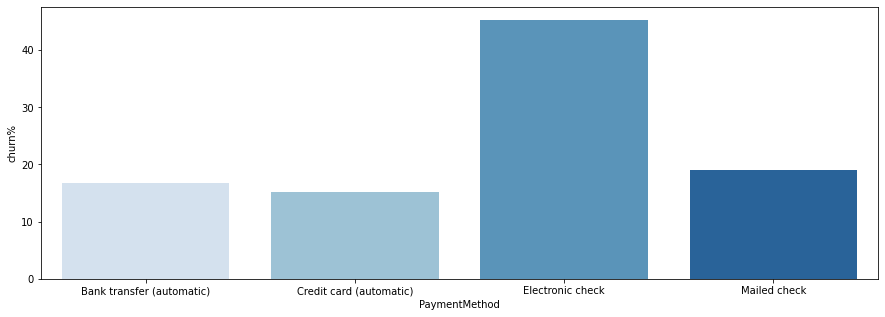

In [93]:
plt.figure(figsize = (15,5))
sns.barplot(x = cr.index, y = cr['churn%'], palette = 'Blues')

Observation : Here we can see that the highest churn% is for the category of the customers with Electronic check payment for about 48% followed by the customers with mailed check payment for about 18% and more or less bank transfers,credit card paymenst are equal but to be keen credit card payment is less among all the other payment methods for only about 14%

## MonthlyCharges :

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

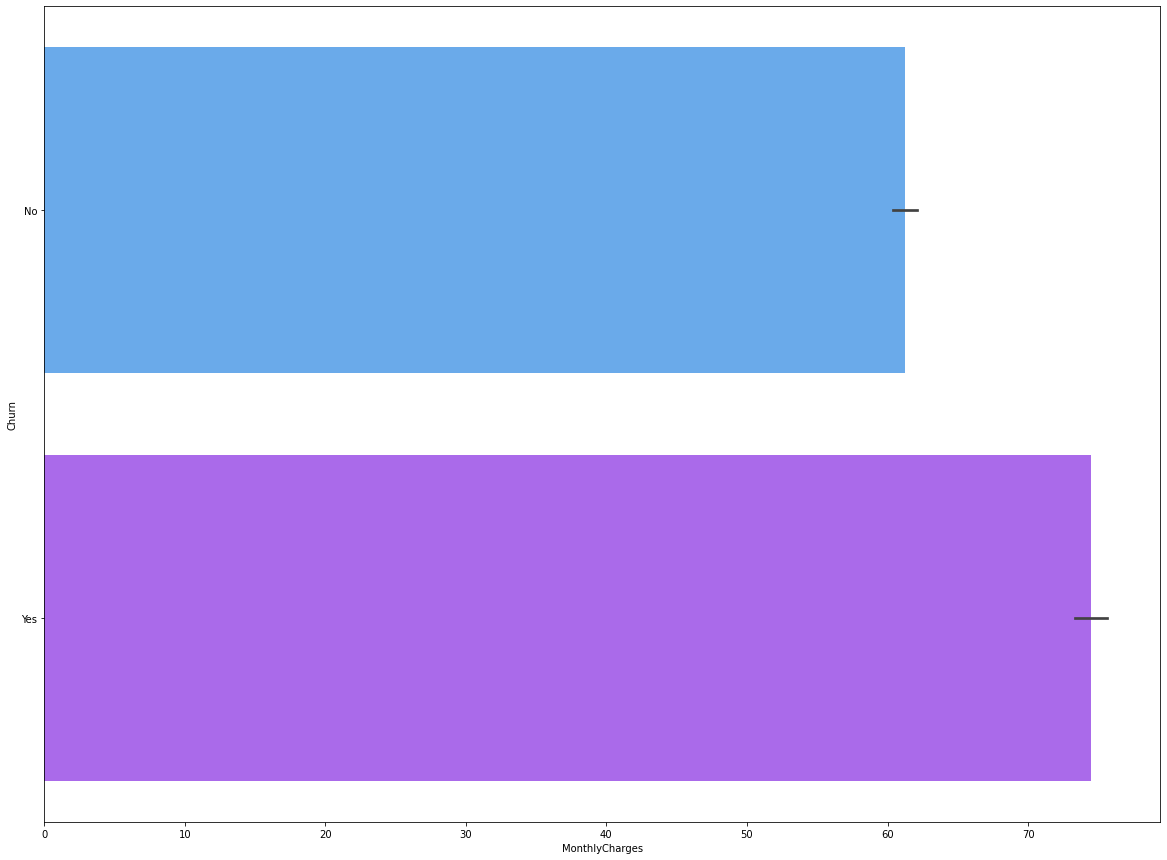

In [94]:
plt.figure(figsize = (20,15))
sns.barplot(x = 'MonthlyCharges', y = 'Churn', data = Customer_churn_data, palette = 'cool')

Observation : here we can see that the increase with the monthly charges the churn rate is also high for about 80 .

## TotalCharges :

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

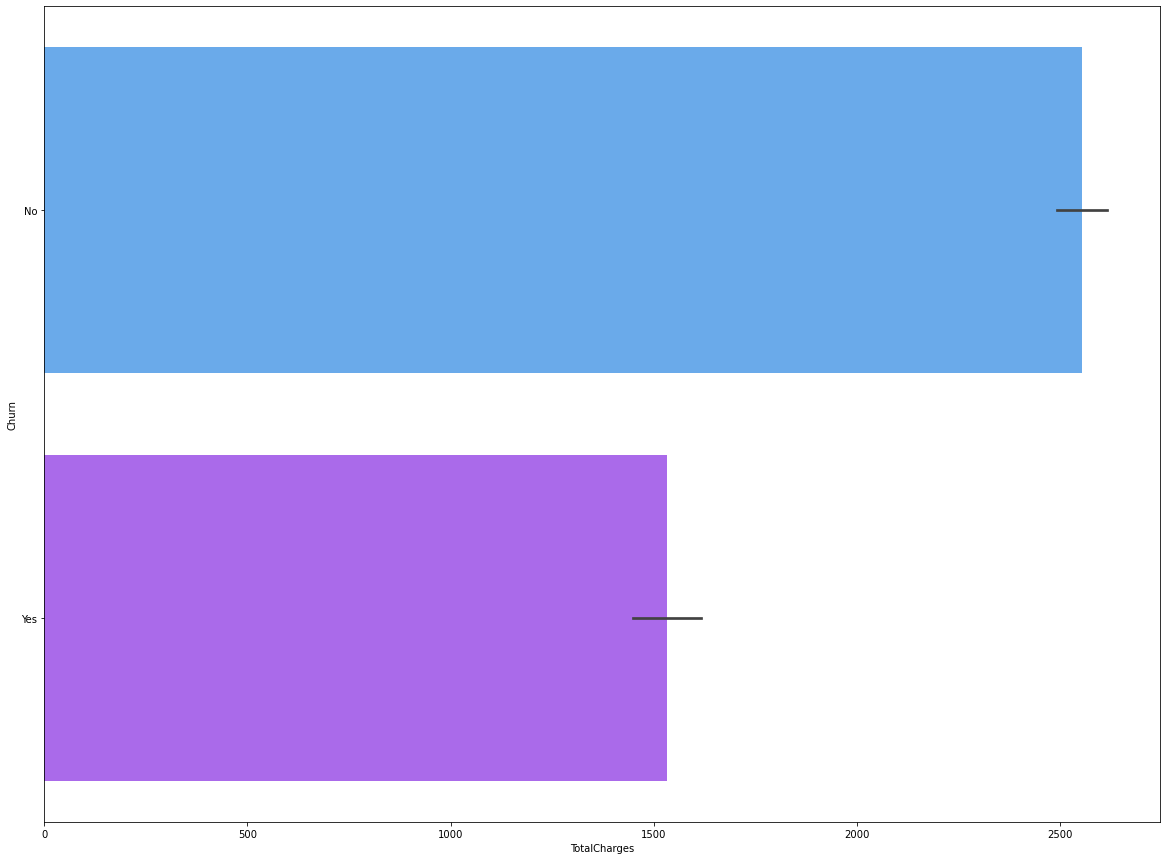

In [95]:
# TotalCharges :

plt.figure(figsize = (20,15))
sns.barplot(x = 'TotalCharges', y = 'Churn', data = Customer_churn_data, palette = 'cool')

Observation : Here we can see that as the Total charges increased the churn rate is highest for the customers with the category "No" .

### Before moving to multivariate analysis we will encode the categorical variables into numerical variables :

In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
# Inspite of mentioning each and every which has strings we user "forloop" here as the data seems to be big.

In [98]:
for column in Customer_churn_data.columns:
    if Customer_churn_data[column].dtype == np.number:
        continue
    Customer_churn_data[column] = LabelEncoder().fit_transform(Customer_churn_data[column])
        

In [99]:
Customer_churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Multivariate Analysis : 

## Here we will check the correlation between the variables :

In [100]:
corr = Customer_churn_data.corr()

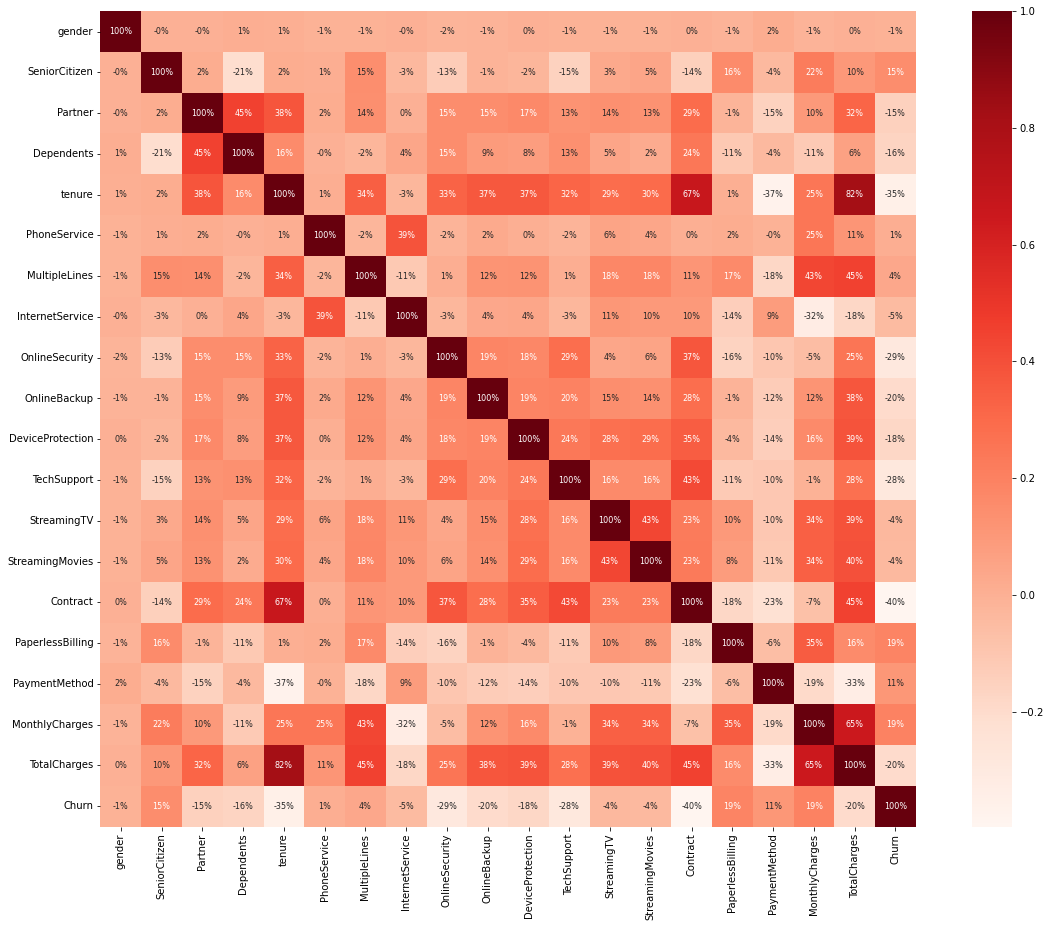

In [101]:
plt.figure(figsize = (20,15))
sns.heatmap(corr,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size':8}, cmap = 'Reds')
plt.show()

Observation : Here we can see that the column tenure has the highest correlation with the column "Total Charges" and also we can see that no other columns are multicollinear to eachother.

# Checking the outliers :

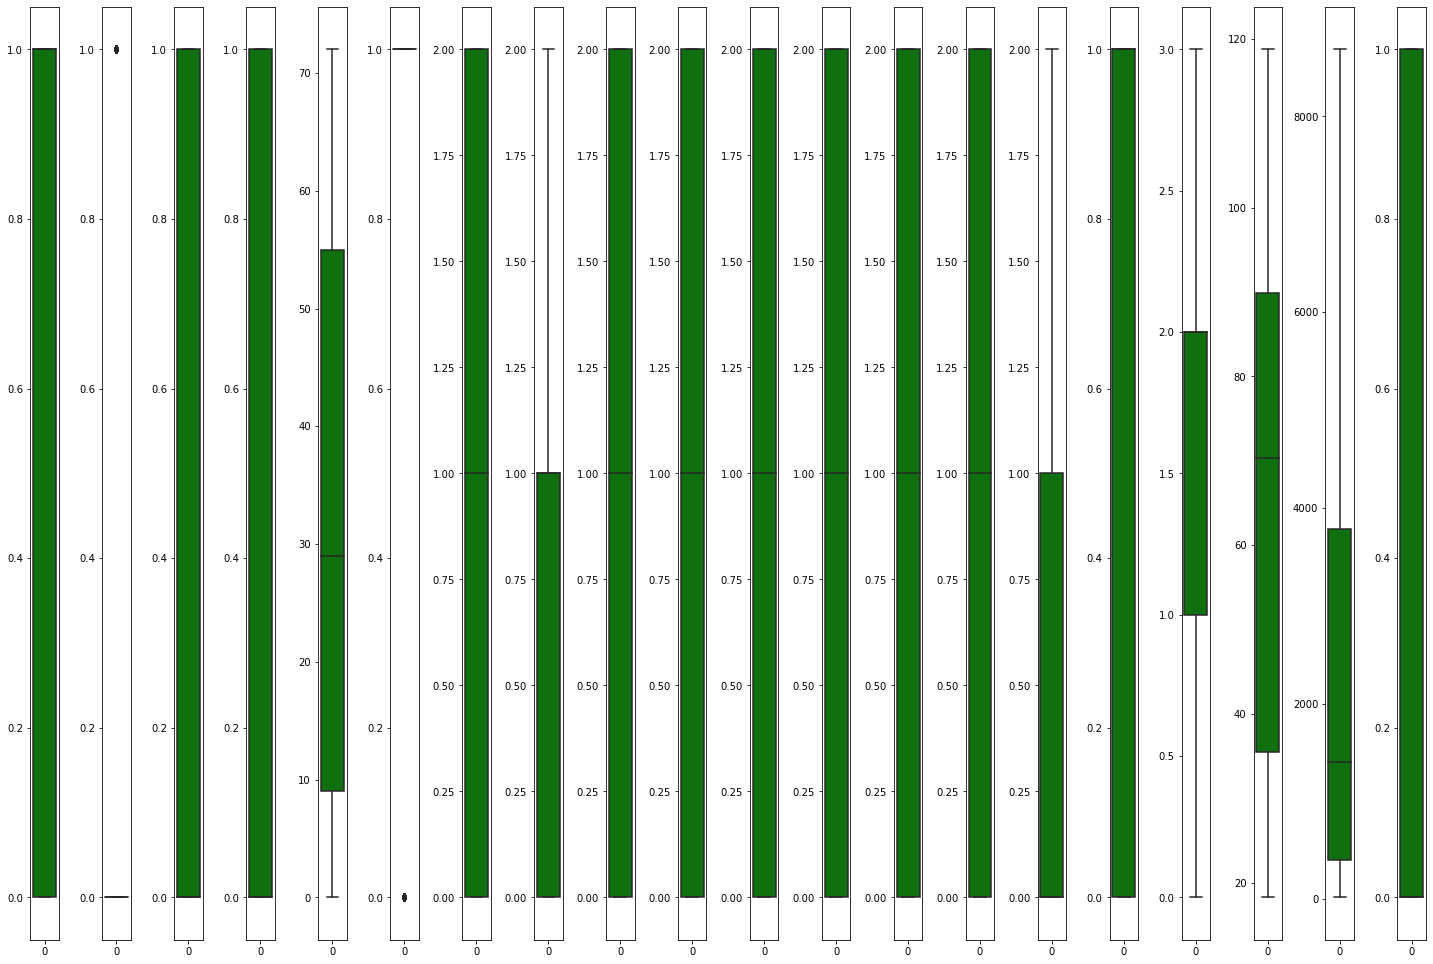

In [102]:
col_list = Customer_churn_data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = Customer_churn_data[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

Observation : Here we can see that there are not many outliers seen but even then we will try to ruleout the outliers present .

# Removing the outliers through Z -Score method :

In [103]:
from scipy.stats import zscore
z = np.abs(zscore(Customer_churn_data))
z.shape

(7043, 20)

In [104]:
threshold = 3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [105]:
Customer_churn_data_new = Customer_churn_data[(z<3).all(axis = 1)]
print(Customer_churn_data.shape)
print(Customer_churn_data_new.shape)

(7043, 20)
(6361, 20)


Observation : Here we can see that the number of records got reduced thus we can say that we have successfully removed the outliers to certain extent .

# Loss percentage calculation :

In [106]:
loss_percent = (7043-6361)/7043*100
print(loss_percent)

9.683373562402386


Observation : Here we can see that there is loss of 9.6% and we can now proceed with our model building .

# Checking the skewness :

In [107]:
Customer_churn_data_new.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.899649
Churn               1.053055
dtype: float64

In [108]:
features = ["TotalCharges","SeniorCitizen"]

In [109]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [110]:
Customer_churn_data_new[features] = scaler.fit_transform(Customer_churn_data_new[features].values)
Customer_churn_data_new[features]

,TotalCharges,SeniorCitizen
1,0.222457,-0.441591
2,-1.400891,-0.441591
4,-1.265537,-0.441591
5,-0.379577,-0.441591
6,0.247579,-0.441591
...,...,...
7037,0.001314,-0.441591
7038,0.264486,-0.441591
7039,1.527177,-0.441591
7041,-0.942361,2.264538


In [111]:
Customer_churn_data_new.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.148971
Churn               1.053055
dtype: float64

Observation : Here we can see taht the skewness of the column "TotalCharges" reduced but the othet column "SeniorCitizen" did not change its skewness .

# Data Preprocessing :

## Separating the independent and traget variables :

### train_test_split :

In [112]:
x = Customer_churn_data_new.drop("Churn", axis=1)
y = Customer_churn_data_new["Churn"]

In [113]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,-0.441591,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0.222457
2,1,-0.441591,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,-1.400891
4,0,-0.441591,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,-1.265537
5,0,-0.441591,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,-0.379577
6,1,-0.441591,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,0.247579


In [114]:
y.head()

1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int32

## Scaling x_data using standard_scaler :

In [115]:
from sklearn.preprocessing import  StandardScaler

In [116]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.992638,-0.441591,-0.972245,-0.653600,0.063470,0.0,-0.936163,-1.350531,1.436848,-1.052857,1.262811,-0.935165,-1.148627,-1.152974,0.370335,-1.211765,1.335443,-0.336617,0.222457
1,0.992638,-0.441591,-0.972245,-0.653600,-1.237704,0.0,-0.936163,-1.350531,1.436848,1.252556,-1.044785,-0.935165,-1.148627,-1.152974,-0.828495,0.825243,1.335443,-0.438432,-1.400891
2,-1.007416,-0.441591,-0.972245,-0.653600,-1.237704,0.0,-0.936163,0.046790,-0.929747,-1.052857,-1.044785,-0.935165,-1.148627,-1.152974,-0.828495,0.825243,0.399691,0.114985,-1.265537
3,-1.007416,-0.441591,-0.972245,-0.653600,-0.993734,0.0,1.068190,0.046790,-0.929747,-1.052857,1.262811,-0.935165,1.145381,1.141072,-0.828495,0.825243,0.399691,1.065811,-0.379577
4,0.992638,-0.441591,-0.972245,1.529987,-0.424470,0.0,1.068190,0.046790,-0.929747,1.252556,-1.044785,-0.935165,1.145381,-1.152974,-0.828495,0.825243,-0.536060,0.719309,0.247579


In [117]:
from sklearn.model_selection import  train_test_split, cross_val_score

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 23995)

# Training the model :

### here we will use "forloop" for using models continously without getting interrupted:

In [119]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier

# Training :

In [120]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(x_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


# Testing :

In [121]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(x_test,y_test)*100))

LogisticRegression: 80.46%
K-Nearest Neighbors: 76.58%
Decision Tree: 73.70%
Random Forest: 80.30%
Gradient Boosting: 80.78%


# Hyper parameter Tuning :

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,40],
             'max_depth':[2,4,6]}

# Gradient Boosting Classifier :

here we use "GradientBoostingClassifier" because this model has highest accuracy score when compared to the other models.

In [124]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [125]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 40]})

In [126]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 40}

In [127]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

observation: here we can see that the best_parameteers are selected.

In [128]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'log2')
GradientBoosting.fit(x_train,y_train)
GradientBoosting.score(x_train,y_train)

pred_decision = GradientBoosting.predict(x_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,x,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: -2.282289735316878
Cross Val Score: 80.42752968029761


## Classification Report :

In [129]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [130]:
print(classification_report(y_test,pred_decision))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1430
           1       0.63      0.55      0.59       479

    accuracy                           0.81      1909
   macro avg       0.75      0.72      0.73      1909
weighted avg       0.80      0.81      0.80      1909



#### Observation : Here we can see that the model is good and f1 score is balanced .

## Checking for the AUC Score :

In [131]:
print(roc_auc_score(y_test, pred_decision))

0.7231214505744777


## Plotting the ROC Curve :

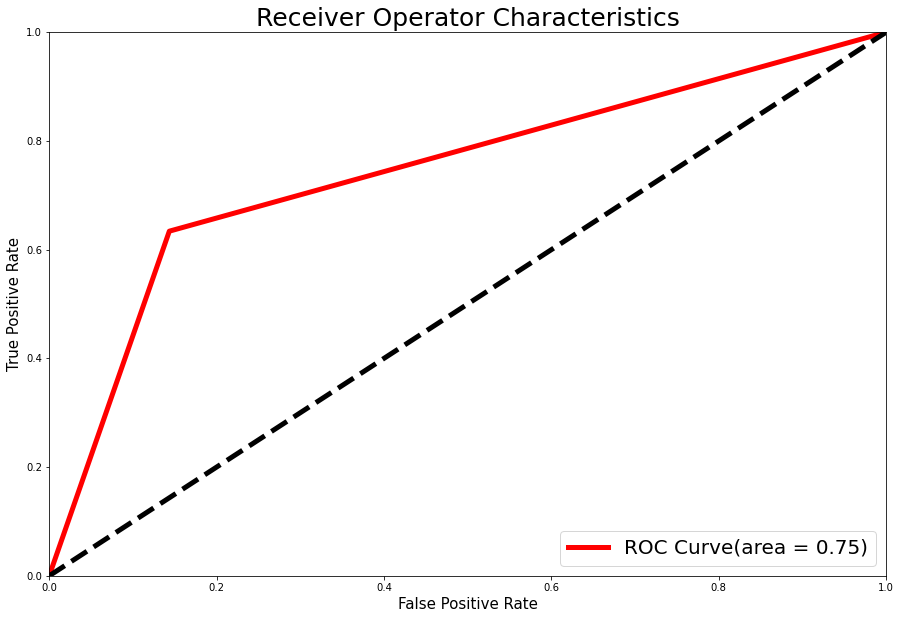

In [132]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds = roc_curve(pred_decision, y_test)
roc_auc = auc(fpr,tpr)
plt.figure(figsize = (15,10))
plt.plot(fpr, tpr, lw=5, color = 'red',label = 'ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1], lw =5, color = 'black',linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver Operator Characteristics',fontsize = 25)
plt.legend(loc = 'lower right', fontsize = 20)
plt.show()

# Saving the model :

In [133]:
import pickle
filename = 'churn.pkl'
pickle.dump(GradientBoosting,open(filename, 'wb'))

In [134]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(x_test, y_test)
print(result)

0.8077527501309586


# Conclusion :

In [135]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])

In [136]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908
Predicted,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Original,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Hence we can conclude saying that our best model "Gradient Boosting" is with accuracy achieved is "80.7%"